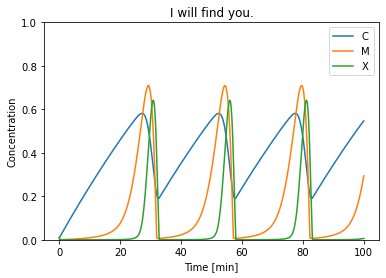

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

# 1. initial conditions
C0 = 0.01                   # initial population
M0 = 0.01                      # initial zombie population
X0 = 0.01                      # initial death population
y0 = [C0, M0, X0]           # initial condition vector

# 2. parameter values

v_i = 0.025
v_d = 0.25
K_d = 0.02
k_d = 0.01
V_M1 = 3
V_M3 = 1
V_2 = 1.5
V_4 = 0.5
K_c = 0.5
K_1 = 0.005
K_2 = 0.005
K_3 = 0.005
K_4 = 0.005

# time intervals
start = 0.0
end = 100.0
t = np.linspace(start, end, 1000)

# function 'f' to solve the system dy/dt = f(y, t)
def f(y, t):
    Ci = y[0]
    Mi = y[1]
    Xi = y[2]
    # the model equations
    
    V_1 = (Ci/(K_c+Ci))*V_M1
    V_3 = Mi*V_M3
    f0 = v_i - v_d*Xi*Ci/(K_d+Ci)-(k_d*Ci)
    f1 = V_1*(1-Mi)/(K_1+(1-Mi))-V_2*(Mi/(K_2+Mi))
    f2 = V_3*(1-Xi)/(K_3+(1-Xi))-V_4*(Xi/(K_4+Xi))
    
    return [f0, f1, f2]

# solve the DEs
result = odeint(f, y0, t)
C = result[:, 0]
M = result[:, 1]
X = result[:, 2]

# plot results
plt.figure()
plt.plot(t, C, label='C')
plt.plot(t, M, label='M')
plt.plot(t, X, label='X')
plt.xlabel('Time [min]')
plt.ylabel('Concentration')
plt.title('I will find you.')
plt.ylim([0,1])
plt.legend(loc=0)